## Jacobian Calculations from am modeling software

In this nb we are looking at the Jacobian for T_rj. Below is an equation taken from the handbook stating "The Nscale statement applies a scale factor x to SECTION 8.2.1 AN EXAMPLE FROM WATER VAPOR RADIOMETRY 141 the tropospheric part of this profile, and our differentiation variable is this scale factor, not the total water vapor column density itself. That is, we're computing ∂T_R−J /∂x and not ∂T_R−J /∂ N_H2O . The relationship between the two is:

$\frac{\delta T_{rj}}{\delta N_{H20}}=(\frac{\delta N_{H20}}{\delta x})^{-1} * \frac{\delta T_{rj}}{\delta x} = \frac{1}{N_{0}} * \frac{\delta T_{rj}}{\delta x}$

where N_0 is the unscaled median tropospheric column density at x=1 . As documented in the listing of Example 2.5, N 0=1.86 precipitable millimeters. (We could also have found this by examining the column density summaries in the stderr output after a run with x=1 .)

In [161]:
##### import matplotlib.pyplot as plt
#edit
import numpy as np
import matplotlib.scale as scale
import matplotlib.pyplot as plt
import yaml
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import sys
sys.path.insert(0,"/Users/jillg/code/CMB_s4/Atmos/Atmos_pwv_flucts")

from Atmos_pwv_funcs import *

%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 6]

In [160]:
!ls Atmos_pwv_flucts

Atacama_1000u_50deg.txt       Pole_300u_50deg.txt
Atacama_1000um_wjacobian.txt  Pole_400u_50deg.txt
Atacama_1000um_wojacobian.txt README.md
Atacama_900u_50deg.txt        SPole_300um_wjacobian.txt
Atacama_900um_wjacobian.txt   SPole_300um_wojacobian.txt
Atacama_900um_wojacobian.txt  SPole_400um_wjacobian.txt
Atmos_pwv_flucts.ipynb        SPole_400um_wojacobian.txt
Atmos_pwv_funcs.py            __pycache__
Jacobians_am.ipynb            channels.yaml
LICENSE


In [220]:
#Read in --wjacobian.txt file here:

#ACT am files
a900 = np.loadtxt('Atmos_pwv_flucts/Atacama_900um_wjacobian.txt', unpack=True) #sf: 0.966
a1000 = np.loadtxt('Atmos_pwv_flucts/Atacama_1000um_wjacobian.txt',unpack=True) # sf: 1.07
#below is the jacobian with both inputs as 1.0 ie. am ... 1.0 1.0
#a900 = np.loadtxt('Atmos_pwv_flucts/A_new_wjacobian.txt', unpack=True)

#SPole am files
sp300 = np.loadtxt('Atmos_pwv_flucts/SPole_300um_wjacobian.txt',unpack=True) #sf: 0.706
sp400 = np.loadtxt('Atmos_pwv_flucts/SPole_400um_wjacobian.txt',unpack=True) #sf: 0.941
#below is the jacobian with both inputs as 1.0 ie. am ... 1.0 1.0
#sp300 = np.loadtxt('Atmos_pwv_flucts/SP_new_wjacob.txt', unpack=True)

Text(0.5, 0.98, 'Atacama')

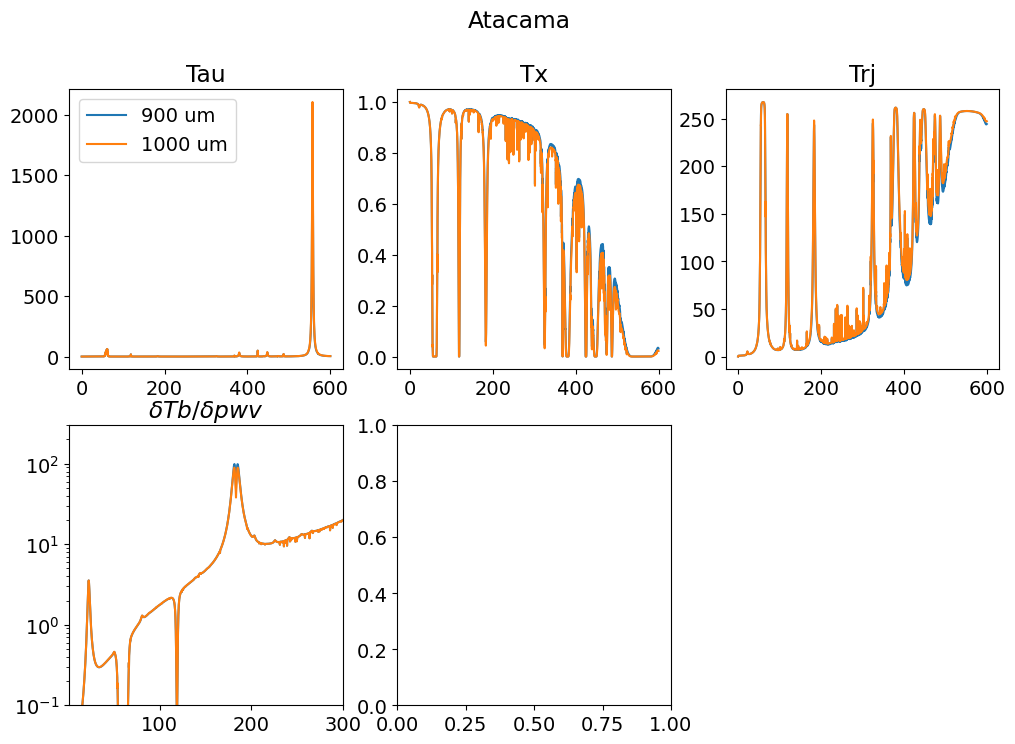

In [189]:
#this will be necessary when the Jacobian is incorporated
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 8]

#figure.set_constrained_layout_pads(w_pad=5 / 72, h_pad=2 / 72, hspace=0.5,
                               # wspace=1.0)

act_freq=a900[0]

plt.subplot(2,3,1)
plt.plot(act_freq, a900[1], label='900 um') #tau neper
plt.plot(act_freq, a1000[1], label='1000 um')
plt.title('Tau')
plt.legend()

plt.subplot(2,3,2)
plt.plot(act_freq, a900[2]) #transmittance
plt.plot(act_freq, a1000[2])
plt.title('Tx')

plt.subplot(2,3,3)
plt.plot(act_freq, a900[3]) #trj K
plt.plot(act_freq, a1000[3])
plt.title('Trj')

plt.subplot(2,3,4)
plt.semilogy(act_freq, a900[4]) # delta Tb / delta pwv (K/mm?)
plt.semilogy(act_freq, a1000[4])
plt.ylim(0.1, 300)
plt.xlim(1, 300)
plt.title('$\delta Tb/ \delta pwv$')
#plt.legend()

plt.subplot(2,3,5)
#plt.plot(act_freq, a900[5]) #? Jacobian of Trj
#plt.plot(act_freq, a1000[5])
#plt.title('Jacobian')

#plt.subplot(2,3,6)
#plt.plot(act_freq, a1000[3])
#plt.plot(act_freq, a1000[5])
#plt.title('Trj & Jacobian')
plt.suptitle('Atacama')

Text(0.5, 0.98, 'Pole')

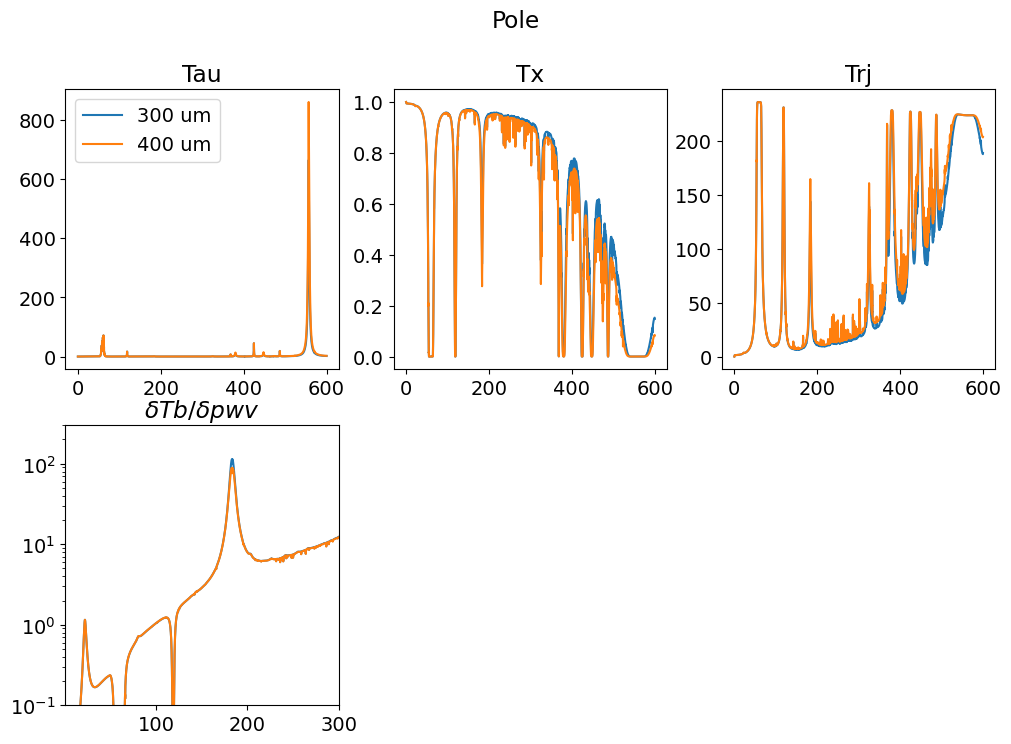

In [190]:
#Repeat for SPole
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 8]

#figure.set_constrained_layout_pads(w_pad=5 / 72, h_pad=2 / 72, hspace=0.5,
                               # wspace=1.0)

freq=sp300[0]

plt.subplot(2,3,1)
plt.plot(freq, sp300[1], label='300 um') #tau neper
plt.plot(freq, sp400[1], label='400 um')
plt.title('Tau')
plt.legend()

plt.subplot(2,3,2)
plt.plot(freq, sp300[2]) #transmittance
plt.plot(freq, sp400[2])
plt.title('Tx')

plt.subplot(2,3,3)
plt.plot(freq, sp300[3]) #trj K
plt.plot(freq, sp400[3])
plt.title('Trj')

plt.subplot(2,3,4)
plt.semilogy(freq, sp300[4]) # delta Tb / delta pwv (K/mm?)
plt.semilogy(freq, sp400[4])
plt.ylim(0.1, 300)
plt.xlim(1, 300)
plt.title('$\delta Tb/ \delta pwv$')
plt.suptitle('Pole')

[0.000e+00 1.000e-01 2.000e-01 ... 5.998e+02 5.999e+02 6.000e+02] [ 0.000000e+00 -2.519704e-05 -6.959775e-05 ...  3.351324e+01  3.313325e+01
  3.241874e+01]


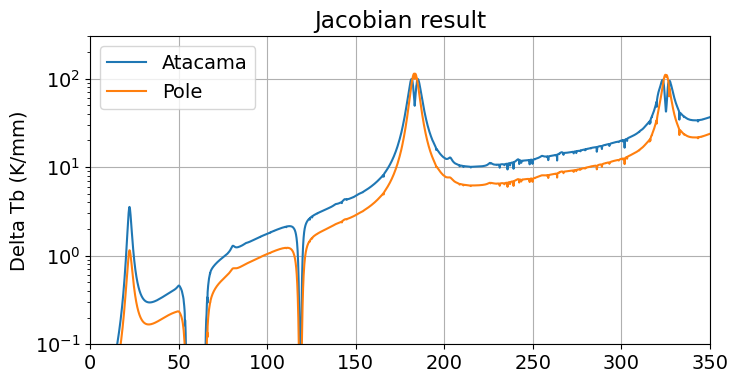

In [191]:
#reproducing a similar plot to the Atmos_pwv_flucts nb
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [8, 4]

# plot Tb differences between pwvs, which are 0.1mm pwv apart.

plt.semilogy(act_freq,a900[4],label='Atacama')  #dividing the act dTb number to match with original results
plt.semilogy(freq,sp300[4],label='Pole')
plt.ylabel('Delta Tb (K/mm)')
plt.legend()
plt.xlim(0,350)
plt.ylim(0.1,300)
plt.grid()
plt.title('Jacobian result')

print(act_freq,a900[4])

This plot was originally slightly different from the one produced in the other nb. Need to resolve what the $\delta pwv$ value is. If we % by 2.2 we get a similar plot.

## Orginal file & code:

In [166]:
a900wo = np.loadtxt('Atmos_pwv_flucts/Atacama_900um_wojacobian.txt', unpack=True)
a1000wo = np.loadtxt('Atmos_pwv_flucts/Atacama_1000um_wojacobian.txt',unpack=True)

sp300wo = np.loadtxt('Atmos_pwv_flucts/SPole_300um_wojacobian.txt',unpack=True)
sp400wo = np.loadtxt('Atmos_pwv_flucts/SPole_400um_wojacobian.txt',unpack=True)

[0.000e+00 1.000e-01 2.000e-01 ... 5.998e+02 5.999e+02 6.000e+02] [ 0.0000e+00 -2.6000e-05 -7.3000e-05 ...  2.9857e+01  2.9492e+01
  2.8859e+01]


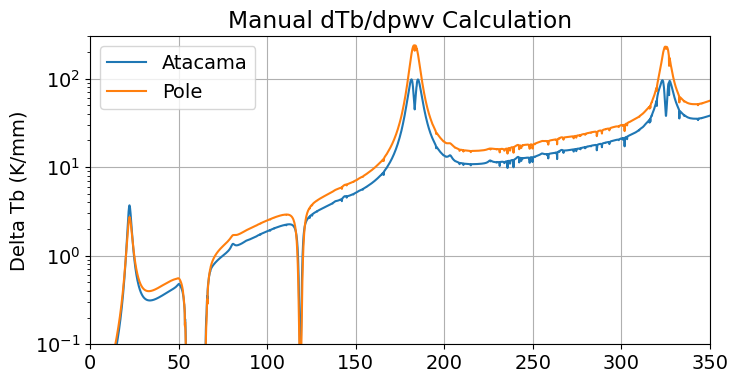

In [167]:
# plot Tb differences between pwvs, which are 0.1mm pwv apart.
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [8, 4]
dpwv = 0.1 #mm
nuvec = sp400wo[0]
Tbdiff_pole = (sp400wo[4]-sp300wo[4])/dpwv  #K/mm
Tbdiff_atacama = (a1000wo[4]-a900wo[4])/dpwv  #K/mm

plt.semilogy(nuvec,Tbdiff_atacama,label='Atacama')
plt.semilogy(nuvec,Tbdiff_pole,label='Pole')
plt.ylabel('Delta Tb (K/mm)')
plt.legend()
plt.xlim(0,350)
plt.ylim(0.1,300)
plt.grid()
plt.title('Manual dTb/dpwv Calculation')

print(nuvec, Tbdiff_atacama)

In [168]:
print(a900[4]/2.22, Tbdiff_atacama)

[ 0.00000000e+00 -1.13500180e-05 -3.13503378e-05 ...  1.50960541e+01
  1.49248874e+01  1.46030360e+01] [ 0.0000e+00 -2.6000e-05 -7.3000e-05 ...  2.9857e+01  2.9492e+01
  2.8859e+01]


In the first plot, we have adjusted the scaling on the atacama dpwv values by diving by 2.2.  This gives similar results to those used in the main notebook visually in the plots, but numerically they are still different. Should we look back at the am model and try to estimate the scaling differently?

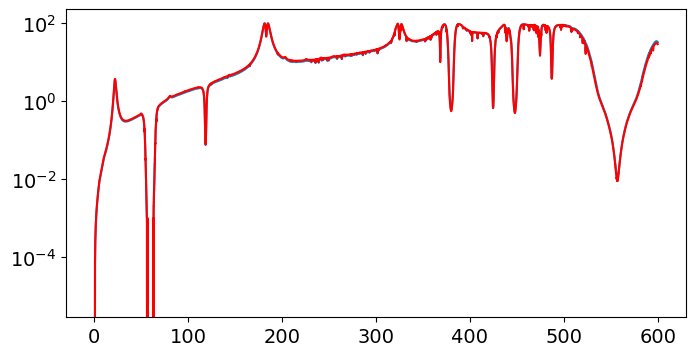

In [193]:
plt.semilogy(act_freq, a900[4])#/0.966)
plt.semilogy(nuvec,Tbdiff_atacama, color='red')

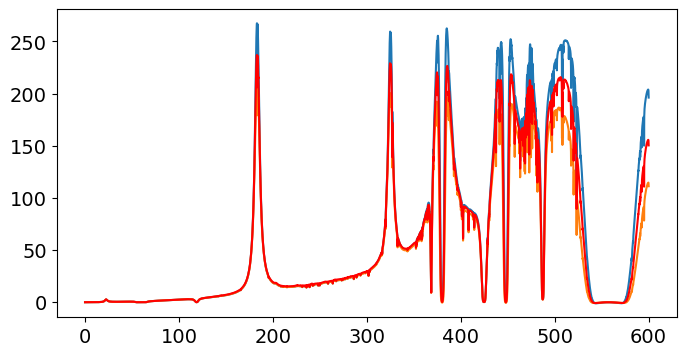

In [217]:
plt.plot(freq,sp300[4]/0.425)
plt.plot(freq,sp400[4]/0.425)
plt.plot(nuvec,Tbdiff_pole, color='red')

In [ ]:
#rerun with 1.0 in scale factor and then divide here by number (0.425? or 0.3? or 0.941)

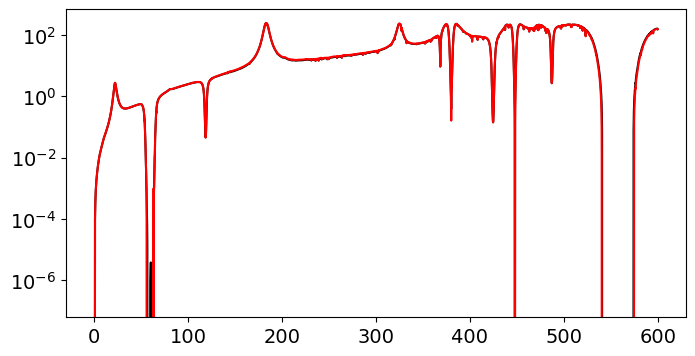

In [219]:
x=(sp300[4]/0.425)+(sp400[4]/0.425)
plt.semilogy(freq, x/2, color='black')
plt.semilogy(nuvec,Tbdiff_pole, color='red')

I reran the Jacobian results for South Pole and Atacama with 1.0 in the scale factor and the ACT data didn't really change (assuming its because the regular scale factors are closer to 1.0). The SP results changed slightly. I'm not sure if this is correct.